---

### 1. Conceitos Básicos

#### 1.1 Entropia (Shannon Entropy)

A entropia é uma medida da incerteza ou surpresa de uma variável aleatória. Foi introduzida por Claude Shannon em 1948 em seu trabalho seminal sobre a teoria da informação. A entropia é frequentemente usada em ciências da informação para quantificar a quantidade de informação que é incerta ou imprevisível.

A fórmula para a entropia de uma distribuição de probabilidade discreta \( p(x) \) é:
$$
H(p) = - \sum_x p(x) \log(p(x))
$$
Onde o somatório é sobre todos os valores possíveis de \( x \).

#### 1.2 Entropia Cruzada

A entropia cruzada mede a diferença entre duas distribuições de probabilidade. Se você tem uma distribuição de probabilidade verdadeira \( p \) e uma aproximação \( q \), a entropia cruzada entre essas duas distribuições é:
$$
H(p, q) = - \sum_x p(x) \log(q(x))
$$
Aqui, \( p \) é a distribuição de probabilidade real e \( q \) é a distribuição de probabilidade estimada.

### 2. Aplicação em Machine Learning: Cross Entropy Loss

Em aprendizado de máquina, particularmente em problemas de classificação, a entropia cruzada é usada como uma função de perda. Ela quantifica a diferença entre a distribuição de probabilidade real (os rótulos verdadeiros) e a distribuição de probabilidade prevista pelo modelo.

Para um problema de classificação binária, a fórmula da entropia cruzada é:

$$
L = - \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]
$$

Onde:
- $(N)$ é o número de exemplos no conjunto de dados.
- $(y_i)$ é o rótulo verdadeiro do i-ésimo exemplo.
- $ \hat{y}_i $ é a probabilidade prevista de  $(y_i = 1)$ para o i-ésimo exemplo.

### 3. Por que usar Cross Entropy Loss?

Cross Entropy Loss é uma excelente escolha para problemas de classificação porque:

1. **Diferenciabilidade**: É uma função contínua e diferenciável, o que é ótimo para otimização usando gradient descent.
2. **Penaliza Previsões Erradas**: Dá uma grande penalidade para previsões que estão longe do valor verdadeiro.
3. **Relação com a Teoria da Informação**: Como mencionado, tem suas raízes na teoria da informação, dando uma interpretação sólida em termos de "surpresa" ou "incerteza".

### 4. Conexão com o Trabalho de Claude Shannon

A ideia central por trás da entropia cruzada é medir a "surpresa" quando se espera uma distribuição \( p \) mas se observa uma distribuição \( q \). Essa noção de surpresa ou incerteza é fundamental na teoria da informação de Shannon.

Em resumo, a entropia cruzada é uma extensão natural da entropia de Shannon e se tornou uma ferramenta fundamental em aprendizado de máquina para medir a diferença entre distribuições de probabilidade.

---

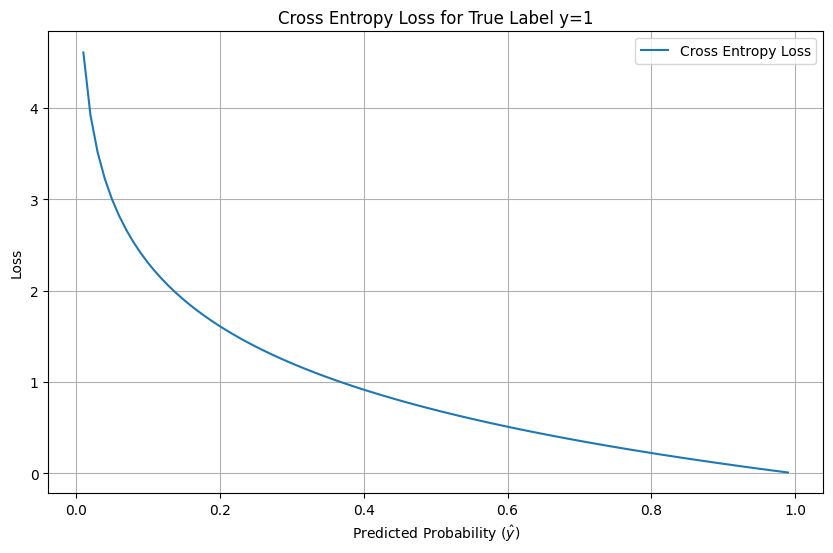

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vamos considerar um caso de classificação binária.
# Suponha que o rótulo verdadeiro seja 1 (ou seja, y=1).

y = 1

# Criamos um array de valores previstos entre 0.01 e 0.99
# (evitamos 0 e 1 por causa do log)
y_hat = np.linspace(0.01, 0.99, 100)

# Calculamos a Cross Entropy Loss para cada valor previsto
loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Plot
plt.figure(figsize=(10,6))
plt.plot(y_hat, loss, label='Cross Entropy Loss')
plt.xlabel('Predicted Probability ($\hat{y}$)')
plt.ylabel('Loss')
plt.title('Cross Entropy Loss for True Label y=1')
plt.legend()
plt.grid(True)
plt.show()


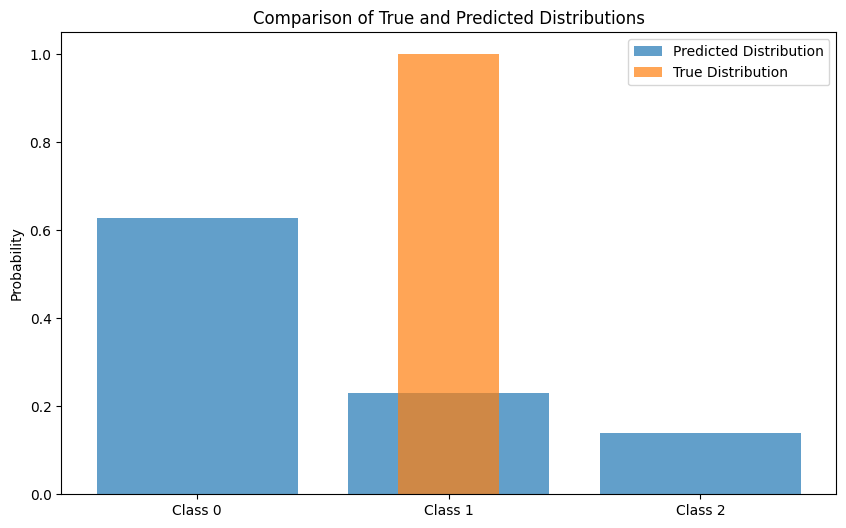

In [2]:
def softmax(logits):
    """Compute softmax values for each sets of scores in logits."""
    exp_logits = np.exp(logits)
    return exp_logits / exp_logits.sum()

# Simulating logits from a hypothetical model for a 3-class classification problem
logits = np.array([2.0, 1.0, 0.5])

# Calculating the softmax values
probabilities = softmax(logits)

# True distribution for label 1 (assuming 0-based indexing)
true_distribution = np.array([0, 1, 0])

# Plot
plt.figure(figsize=(10,6))
classes = ['Class 0', 'Class 1', 'Class 2']
plt.bar(classes, probabilities, label='Predicted Distribution', alpha=0.7)
plt.bar(classes, true_distribution, width=0.4, align='center', label='True Distribution', alpha=0.7)
plt.ylabel('Probability')
plt.title('Comparison of True and Predicted Distributions')
plt.legend()
plt.show()


"Logit" é um termo que tem suas raízes na regressão logística, e refere-se ao valor bruto (ou a "pontuação") que um modelo (geralmente um classificador) produz antes de ser transformado em uma probabilidade. Matematicamente, o logit é o log-odds, e a relação entre o logit e a probabilidade \( p \) é dada por:
$$
\text{logit}(p) = \log \left( \frac{p}{1-p} \right)
$$
No contexto das redes neurais e do aprendizado profundo, os "logits" são comumente os valores de saída de uma camada densa que são então passados para uma função de ativação (como a função softmax) para produzir probabilidades.

Para ilustrar:

1. **Em regressão logística**: 
   - Você teria um logit calculado como uma combinação linear dos recursos: $ ( z = w_1x_1 + w_2x_2 + ... + w_nx_n + b ) $.
   - Este logit é então transformado para obter uma probabilidade usando a função sigmóide: $ ( p = \frac{1}{1 + e^{-z}} ) $ .

2. **Em redes neurais**:
   - A saída de uma camada densa (sem ativação) pode ser considerada como logits.
   - Esses logits são frequentemente passados para uma função softmax (para problemas de classificação multiclasse) para obter uma distribuição de probabilidade sobre as classes.

Em resumo, o logit é uma pontuação bruta que pode ser transformada em uma probabilidade.

---

### Softmax

A função softmax é uma função de ativação que transforma um vetor de números (logits) em um vetor de probabilidades. É frequentemente usada na camada de saída de redes neurais para problemas de classificação multiclasse.

Dado um vetor de logits $ ( z = [z_1, z_2, \dots, z_K] ) $ para $ ( K ) $ classes, a função softmax é definida como:

$$
\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

para $( i = 1, 2, \dots, K )$.

O que esta função faz é:

1. Exponenciar cada componente do vetor, tornando todos os valores positivos.
2. Normalizar o vetor exponenciado para que a soma de seus elementos seja 1.

Como resultado, obtemos um vetor de probabilidades que representa a distribuição de probabilidade estimada das classes.

### Por que "Soft"?

A função softmax é chamada de "soft" por um motivo específico. Vamos compará-la com a função "max" para entender melhor:

- A função **max** pega um vetor de números e seleciona o maior valor, definindo-o como 1, enquanto todos os outros valores são definidos como 0. É uma operação "dura" porque produz uma distribuição de probabilidade que é totalmente certa sobre uma classe e completamente incerta sobre todas as outras.
  
- A função **softmax**, por outro lado, atribui probabilidades positivas a todas as classes, independentemente de quão pequenas sejam. Mesmo que um logit seja muito maior do que os outros, as outras classes ainda receberão alguma probabilidade (embora possa ser extremamente pequena). Isso é "suave" porque não está 100% certo sobre qualquer classe, mas em vez disso distribui a confiança entre todas as classes.

Esta propriedade "suave" é benéfica em muitos cenários de aprendizado de máquina porque:

1. **Diferenciabilidade**: A função softmax é contínua e diferenciável em todos os lugares, o que é útil para otimização usando métodos baseados em gradiente.
  
2. **Incerteza e Generalização**: Ao não estar completamente certo sobre qualquer classe, o modelo pode generalizar melhor e ser menos propenso a overfitting.

3. **Informação de todas as classes**: Em vez de apenas obter a classe mais provável, obtemos informações sobre como o modelo vê todas as outras classes em relação à classe mais provável.

Em resumo, a função softmax transforma logits em uma distribuição de probabilidade suave sobre várias classes, e é uma ferramenta essencial para problemas de classificação multiclasse em aprendizado de máquina e redes neurais.

---